### Exploratory Data Analysis (EDA)

A thorough exploratory data analysis is paramount to gain insights into the dataset's structure, volume, and characteristics. This foundational step precedes the modeling phase, ensuring an informed and strategic approach to model development.

#### 1. **Data Inspection:**
- **Objective:** Initiate the EDA by quantifying the total number of images and faces available for model training, offering a preliminary insight into the dataset's volume and diversity.
- **Method:** Employ descriptive statistics and visualization techniques to facilitate a comprehensive and intuitive understanding of the data.

#### 2. **Dataframe Construction:**
- **Objective:** Create a structured dataframe that encapsulates key information, ensuring efficient image referencing and data manipulation.
- **Process:** Integrate image data and annotations into a cohesive dataframe, streamlining data retrieval and analysis.

#### 3. **Image and Annotation Verification:**
- **Objective:** Validate the accuracy and consistency of image annotations to ensure reliable data for model training.
- **Method:** Visual inspection of a subset of images alongside their annotations, confirming the precision and reliability of the annotated data.

#### **Insights and Observations:**
- **Data Volume and Quality:** A preliminary assessment of the dataset’s volume, diversity, and quality, laying the groundwork for subsequent data preprocessing and modeling.
- **Structured Representation:** The dataframe offers a systematic and accessible representation of the data, enhancing efficiency in data handling and analysis.
- **Annotation Integrity:** Verification processes confirm the integrity and accuracy of annotations, ensuring that the model is trained on reliable and precise data.

#### **Key Takeaways:**
- **Informed Approach:** EDA results are instrumental in shaping the modeling strategy, offering insights into data characteristics and potential challenges.
- **Data Integrity:** Ensuring the accuracy and consistency of annotations is pivotal to develop a model that is both reliable and accurate.
- **Strategic Foundation:** The insights gleaned from EDA inform subsequent steps in data preprocessing, feature engineering, and model development, ensuring an informed and strategic approach.

In [1]:
# import the necessary packages
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2
import xml.etree.ElementTree as et
import pandas as pd

In [2]:
# create file paths for easy reference
image_path = pathlib.Path('../dataset/images')
annot_path = pathlib.Path('../dataset/annotations')
image_directories = sorted(glob.glob(os.path.join(image_path,"*.png")))
label_directories = sorted(glob.glob(os.path.join(annot_path, "*.xml")))

In [3]:
# maximum number of objects will determine columns needed for dataframe
face_count = []
for file in os.listdir(annot_path):
    xml = et.parse(os.path.join(annot_path, file)) 
    root = xml.getroot()
    face_count.append(len(root) - 4)

print("Total number of images: ", len(os.listdir(annot_path)))
print("Maximum # of objects per image: ", max(face_count))
print("Average # of objects per image: ", round(np.mean(face_count),1))

Total number of images:  853
Maximum # of objects per image:  115
Average # of objects per image:  4.8


In [4]:
# check total number of labels per class
label_dict = {'with_mask': 0, 'without_mask': 0, 'mask_weared_incorrect': 0}

for file in os.listdir(annot_path):

    xml = et.parse(os.path.join(annot_path, file)) 
    root = xml.getroot()    

    for i in range(4,len(root)):
        label_dict[root[i][0].text] += 1

print("Faces with mask: ", label_dict['with_mask'])
print("Faces without mask: ", label_dict['without_mask'])
print("Faces with mask worn incorrectly: ", label_dict['mask_weared_incorrect'])

Faces with mask:  3232
Faces without mask:  717
Faces with mask worn incorrectly:  123


In [5]:
# reference: https://docs.python.org/3/library/xml.etree.elementtree.html
# Creating a dictionary that can be used in a dataframe
image_dict = {"image": [],"Dimensions": [], "face_count": []}
# 115 is the max number of faces per image
for i in range(1,116):
    image_dict[f'Object {i}']=[]

# loop through annotation files to parse object information
for file in sorted(os.listdir(annot_path)):
    row = []
    xml = et.parse(os.path.join(annot_path, file)) 
    root = xml.getroot()
    # extract image name and add to start of row
    img = root[1].text
    row.append(img)
    # extract image dimensions
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])
    face_ct = len(root) - 4
    row.append(face_ct)
    
    
    # add column to each row for each object (face). Objects start at the 4th element
    for i in range(4,len(root)):
        temp = []
        # object label - with_mask, without_mask, or mask_weared_incorrect
        temp.append(root[i][0].text)
        # bounding box dimensions
        for point in root[i][5]:
            temp.append(point.text)
        row.append(temp)
    # after appending all objects to row, add a 0 for remainder
    for i in range(len(row),119):
        row.append(0)
        
    # add all elements to the dictionary
    for i,each in enumerate(image_dict):
        image_dict[each].append(row[i])
df = pd.DataFrame(image_dict)

In [6]:
df.head()

,image,Dimensions,face_count,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,0.png,"[512, 366]",3,"[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.png,"[400, 156]",9,"[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]",...,0,0,0,0,0,0,0,0,0,0
2,2.png,"[400, 290]",4,"[with_mask, 68, 42, 105, 69]","[with_mask, 154, 47, 178, 74]","[with_mask, 238, 34, 262, 69]","[mask_weared_incorrect, 333, 31, 366, 65]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.png,"[400, 271]",9,"[with_mask, 52, 53, 73, 76]","[with_mask, 72, 53, 92, 75]","[with_mask, 112, 51, 120, 68]","[with_mask, 155, 60, 177, 83]","[with_mask, 189, 59, 210, 80]","[with_mask, 235, 57, 257, 78]","[with_mask, 289, 60, 309, 83]",...,0,0,0,0,0,0,0,0,0,0
4,4.png,"[301, 400]",1,"[with_mask, 70, 185, 176, 321]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def show_annotated_image(image):
    
    """This function adds annotation labels and bounding boxes to each image
    so that we can display ground truth images with annotations"""
    
    row = df[df['image'] == image]
    idx = row.index
    
    new_image_path = os.path.join(image_path,image)
    
    original_image = cv2.imread(new_image_path)
    
    for obj in row.columns[3:]:
        info = row[obj][idx]
        if info.any():
            label_name = info.iloc[0][0]
            coordinates = info.iloc[0][1:]

            if label_name == 'with_mask':
                label = 'with_mask'
                color = (0, 255, 0)
            elif label_name == 'without_mask':
                label = 'without_mask'
                color = (0, 0, 255)
            else:
                label = 'mask_worn_incorrectly'
                color = (255, 0, 0)
            
            coordinates = [int(pt) for pt in coordinates]

            cv2.rectangle(
                original_image,
                (coordinates[0], coordinates[1]),
                (coordinates[2], coordinates[3]),
                color,
                2
            )
            cv2.putText(original_image, label, (coordinates[0], coordinates[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)) 
    plt.grid(None)

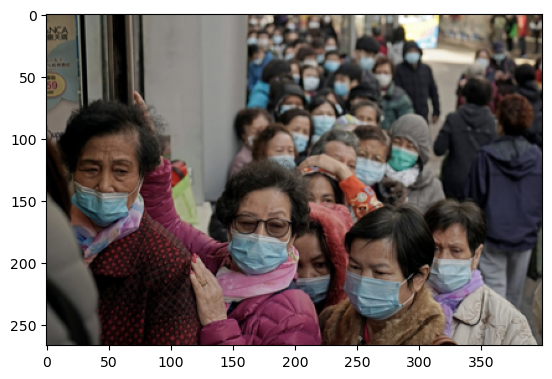

In [8]:
# display original image
test_image_path = os.path.join(image_path,'11.png')
test_image = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB));

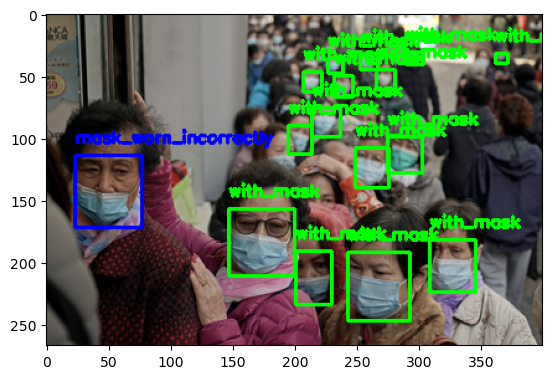

In [9]:
# display annotated image
show_annotated_image('11.png')
plt.grid(None)

In [10]:
# pickle the image dataframe for future reference
df.to_pickle('image_df.pkl')